<a href="https://colab.research.google.com/github/AlvinChiew/DeepLearning/blob/main/TF2_0_ANN_Classification_MNIST_HandwrittenDigits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import itertools

# Load Data & Pre-Processing

In [7]:
mnist = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [17]:
(X_train,y_train), (X_test,y_test) = mnist
X_train, X_test = X_train/255, X_test/255 # Scale X into 0 to 1 for each pixel
X_train.shape # 6000 samples, height = 28 px, length = 28 px

(60000, 28, 28)

# Modeling & Training

In [20]:
 ### Multi-Class Logistics Regression ###

 model = tf.keras.models.Sequential([
     tf.keras.layers.Flatten(input_shape=(28,28)), # convert image into N x D 2D input
     tf.keras.layers.Dense(128, activation='relu'), # 128 hidden units - trial & error; relu - prevent vanishing gradient
     tf.keras.layers.Dropout(0.2), # randomly drop out node with 20% probability - regularization
     tf.keras.layers.Dense(10, activation='softmax') # 10 classes (digit 0 to 9), softmax for multi-classes 
])
model.compile(
    optimizer = 'adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [21]:
log = model.fit(X_train,y_train, validation_data=(X_test,y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2930 - accuracy: 0.9143 - val_loss: 0.1336 - val_accuracy: 0.9612
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1430 - accuracy: 0.9579 - val_loss: 0.1000 - val_accuracy: 0.9705
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1085 - accuracy: 0.9674 - val_loss: 0.0840 - val_accuracy: 0.9733
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0881 - accuracy: 0.9725 - val_loss: 0.0788 - val_accuracy: 0.9750
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0749 - accuracy: 0.9765 - val_loss: 0.0776 - val_accuracy: 0.9761
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0653 - accuracy: 0.9791 - val_loss: 0.0772 - val_accuracy: 0.9776
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0575 - accuracy: 0.9814 - val_loss: 0.0704 - val_accuracy:

# Model Evaluation

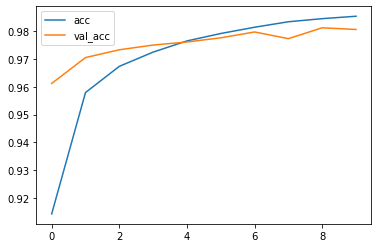

In [23]:
plt.plot(log.history['accuracy'], label='acc')
plt.plot(log.history['val_accuracy'], label='val_acc')
plt.legend()

In [25]:
model.evaluate(X_test,y_test) # (loss,accuracy)

313/313 [==============================] - 0s 1ms/step - loss: 0.0731 - accuracy: 0.9806


[0.07310576736927032, 0.9805999994277954]

## Confusion Matrix

In [27]:
y_predicted = model.predict(X_test).argmax(axis=1)
ConfMatrix = confusion_matrix(y_test, y_predicted)
ConfMatrix

array([[ 970,    0,    2,    1,    1,    1,    2,    1,    2,    0],
       [   0, 1128,    2,    1,    0,    0,    1,    0,    3,    0],
       [   1,    3, 1009,    3,    4,    0,    3,    6,    3,    0],
       [   1,    0,    2,  991,    0,    4,    0,    7,    3,    2],
       [   0,    1,    3,    1,  967,    0,    3,    0,    0,    7],
       [   2,    0,    0,    7,    2,  869,    4,    2,    4,    2],
       [   2,    3,    2,    1,    3,    3,  943,    0,    1,    0],
       [   1,    6,    8,    0,    1,    0,    0, 1005,    1,    6],
       [   4,    0,    4,    2,    7,    2,    2,    2,  946,    5],
       [   1,    3,    0,    6,   13,    3,    0,    4,    1,  978]])

In [33]:
def confusion_matrix_prettify(ConfMatrix, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
    if normalize:
        ConfMatrix = ConfMatrix.astype('float') / ConfMatrix.sum(axis=1)[:,np.newaxis]
        print("Ploting Normalized Confusion Matrix")
    else:
        print("Ploting Confusion Matrix without Normalization")

    plt.imshow(ConfMatrix, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = ConfMatrix.max() / 2.

    for i, j in itertools.product(range(ConfMatrix.shape[0]), range(ConfMatrix.shape[1])):
        plt.text(j, i, format(ConfMatrix[i, j], fmt),
                horizontalalignment="center",
                color="white" if ConfMatrix[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

Ploting Confusion Matrix without Normalization


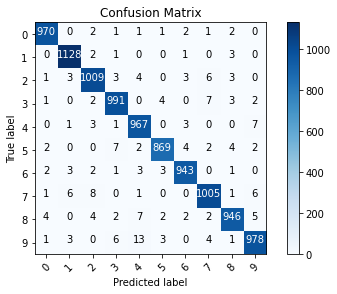

In [34]:
confusion_matrix_prettify(ConfMatrix, list(range(10)))

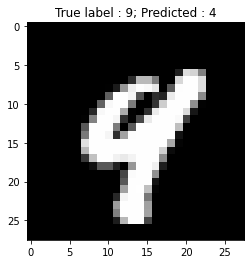

In [43]:
### Show misclassified examples ###

idx_misclassified = np.where(y_predicted != y_test)[0]
i = np.random.choice(idx_misclassified)
plt.imshow(X_test[i], cmap='gray')
plt.title("True label : " +  str(y_test[i]) + "; Predicted : " +  str(y_predicted[i]));